In [1]:
import pandas as pd
import missingno as msno
import geopandas
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import plotly.graph_objects as go
import numpy as np

In [2]:
#I don't want an additional index column to be added
happinessScores = pd.read_csv('AnalysisData\\LadderScores_2005-2018.csv', index_col=0)
happinessScoresNoNulls = pd.read_csv('AnalysisData\\LadderScoresNoNulls_2014-2018.csv', index_col=0)
happiness_money = pd.read_csv('AnalysisData\\world_happiness_other_indicators.csv', index_col=0)

<h2> Insights on ladder score </h2>

In [3]:
happiness_money['Regional indicator'].value_counts()

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Central and Eastern Europe            18
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

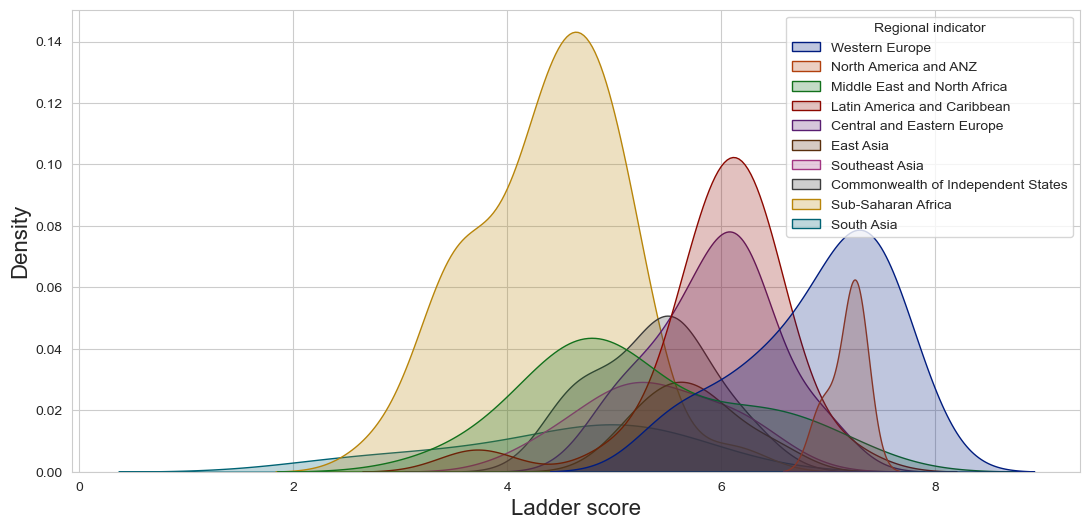

In [142]:
plt.figure(figsize=(13,6))
sb.kdeplot( x = happiness_money['Ladder score'],
            hue= happiness_money['Regional indicator'],
            palette= 'dark',
            fill = True)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('Ladder score', fontsize = 16)
plt.savefig('media4.0\\happiness_density_per_region.jpg', bbox_inches = 'tight')

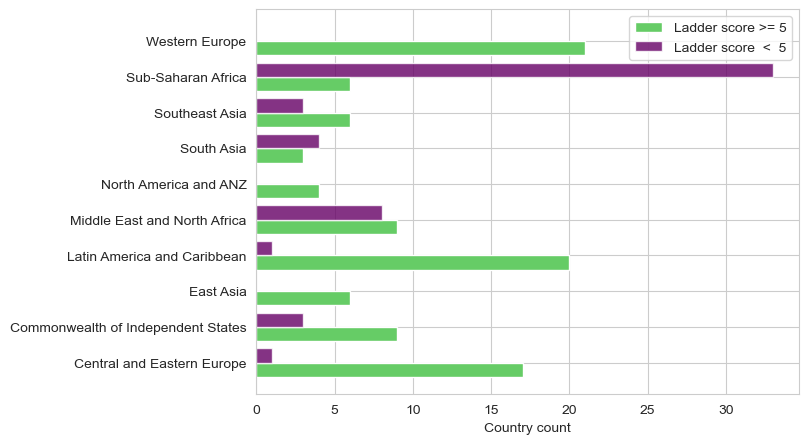

In [166]:
labels = happiness_money.groupby('Regional indicator').groups.keys()

happy_countreis = happiness_money.groupby('Regional indicator')['Ladder score'].apply( lambda x: x[x >= 5].count()).reset_index(name = 'count')
sad_countreis = happiness_money.groupby('Regional indicator')['Ladder score'].apply( lambda x: x[x < 5].count()).reset_index(name = 'count')


x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
fig.set_figwidth(7)
fig.set_figheight(5)

rect1 = ax.barh(x - width/2, happy_countreis['count'], width, label = 'Ladder score >= 5', color = '#66cc66')
rect2 = ax.barh(x + width/2, sad_countreis['count'], width, label= 'Ladder score  <  5', color = '#660066', alpha = 0.8)


ax.set_xlabel('Country count')
ax.set_yticks(x, labels)
ax.legend()
fig.savefig('media4.0\\region_count.jpg', bbox_inches = 'tight')

In [150]:
happiness_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      154 non-null    object 
 1   Country Code                      154 non-null    object 
 2   Regional indicator                154 non-null    object 
 3   Ladder score                      154 non-null    float64
 4   Standard error of ladder score    154 non-null    float64
 5   upperwhisker                      154 non-null    float64
 6   lowerwhisker                      154 non-null    float64
 7   Logged GDP per capita             154 non-null    float64
 8   Social support                    154 non-null    float64
 9   Healthy life expectancy           154 non-null    float64
 10  Freedom to make life choices      154 non-null    float64
 11  Generosity                        154 non-null    float64
 12  Percepti

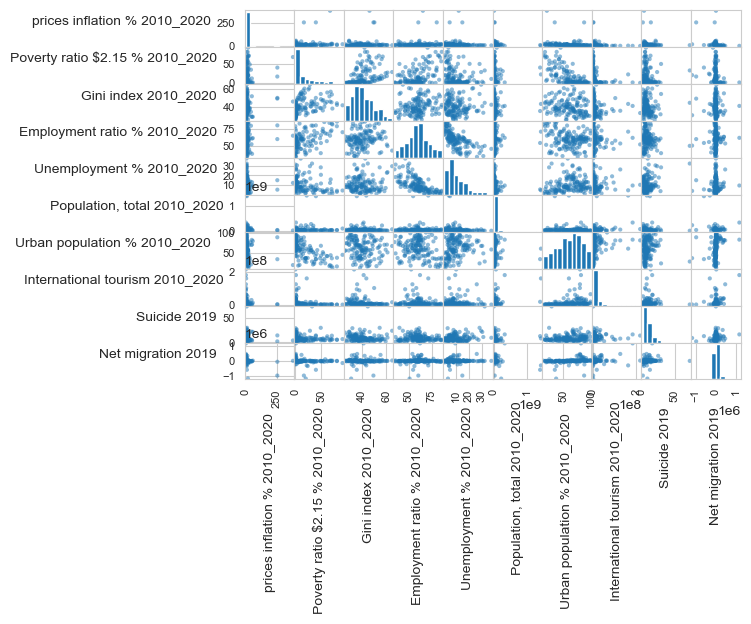

In [159]:
axes = pd.plotting.scatter_matrix(happiness_money.iloc[:, 15: ] )
for ax in axes.flatten():
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.xaxis.label.set_rotation(90)

In [651]:
data = happiness_money.drop(columns = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker']).dropna().reset_index()

In [652]:
data

,index,Country name,Country Code,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,prices inflation % 2010_2020,Poverty ratio $2.15 % 2010_2020,Gini index 2010_2020,Employment ratio % 2010_2020,Unemployment % 2010_2020,"Population, total 2010_2020",Urban population % 2010_2020,International tourism 2010_2020,Suicide 2019,Net migration 2019
0,0,Finland,FIN,Western Europe,7.8087,10.639267,0.954330,71.900826,0.949172,-0.059482,...,4.065954,0.1,28.3,57.563999,10.360000,5521606.0,85.446,4226000.0,15.3,15558.0
1,1,Denmark,DNK,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,...,3.416268,0.5,28.7,63.359001,7.800000,5814422.0,87.994,33093000.0,10.7,23305.0
2,2,Switzerland,CHE,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,...,2.426041,0.1,34.3,65.905998,4.920000,8575280.0,73.849,11818000.0,14.5,43546.0
3,3,Iceland,ISL,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,...,12.694394,0.2,31.8,75.432999,7.560000,360563.0,93.855,2488000.0,11.9,5152.0
4,4,Norway,NOR,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,...,3.753931,0.3,31.6,65.700996,4.680000,5347896.0,82.616,6252000.0,11.8,25564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,147,Botswana,BWA,Sub-Saharan Africa,3.4789,9.711204,0.779122,58.924454,0.821328,-0.250394,...,12.702188,17.7,60.5,52.133999,22.610001,2499702.0,70.172,2344000.0,16.1,2933.0
129,148,Tanzania,TZA,Sub-Saharan Africa,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,...,16.001094,56.2,40.5,85.433998,3.470000,59872579.0,34.500,1527000.0,4.3,-64819.0
130,149,Central African Republic,CAF,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,...,14.898684,61.9,56.2,67.973000,5.716000,5209324.0,41.770,120500.0,12.3,-36942.0
131,150,Rwanda,RWA,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,...,15.438214,66.1,52.0,84.151001,1.170000,12835028.0,17.313,1711000.0,5.6,-11823.0


<AxesSubplot:>

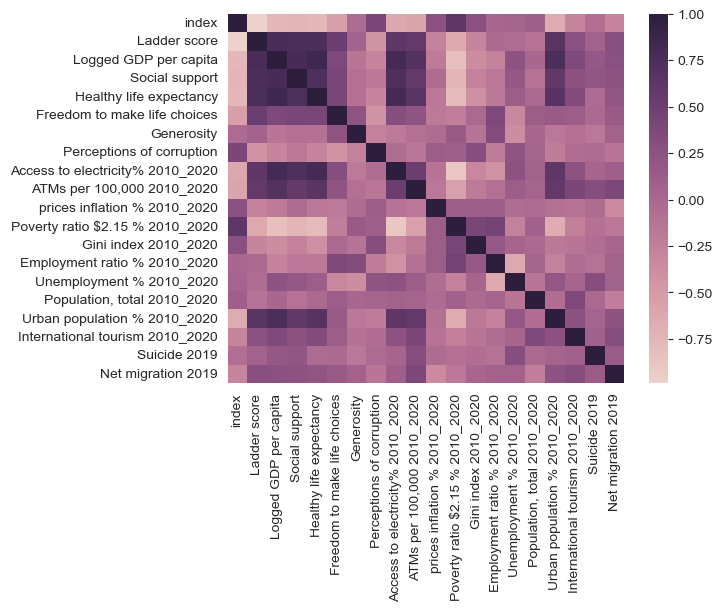

In [690]:
corrmat = data.corr()
sb.heatmap(corrmat, cmap=sb.cubehelix_palette(as_cmap=True))

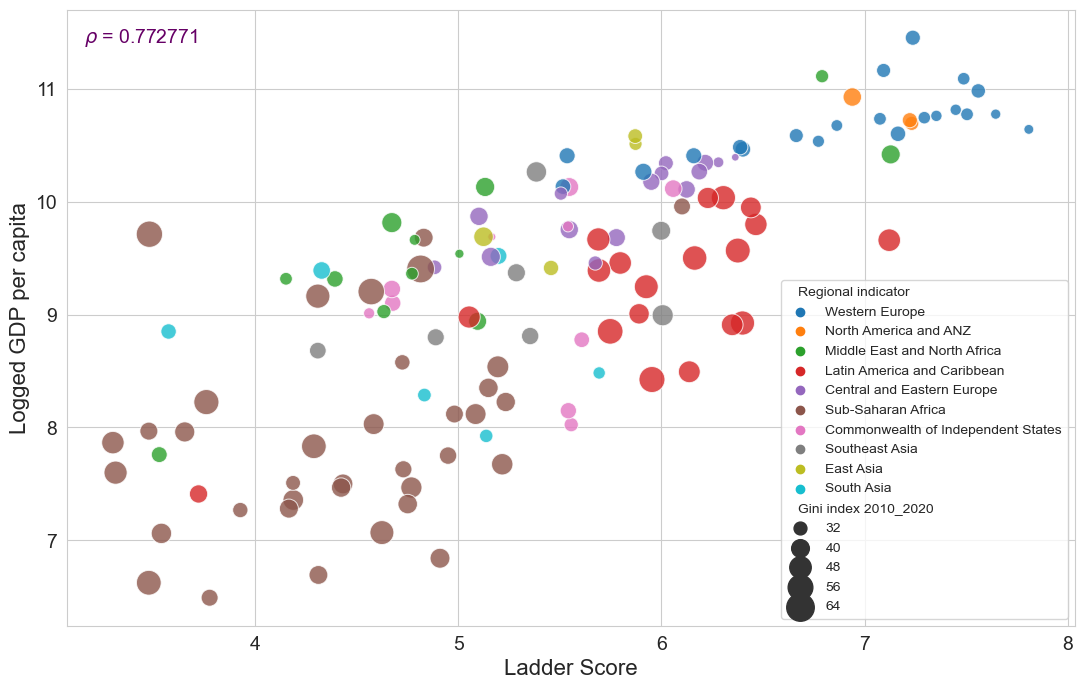

In [702]:
plt.figure(figsize=(13, 8))
sb.scatterplot(
    x = data['Ladder score'],
    y = data['Logged GDP per capita'],
    size= data['Gini index 2010_2020'],
    hue = data['Regional indicator'],
    sizes=(30, 400),
    alpha = 0.8
)
plt.annotate(r'$\rho$ = 0.772771', color = '#660066', xy=(0, 1), xytext=(12, -12), va='top', xycoords='axes fraction', textcoords='offset points', fontsize = 14)
plt.xlabel('Ladder Score', fontsize = 16)
plt.ylabel('Logged GDP per capita', fontsize = 16)
plt.yticks([7,8 , 9, 10, 11], ['7', '8', '9', '10', '11'], fontsize = 14)
plt.xticks([4, 5, 6, 7, 8], ['4', '5', '6', '7', '8'], fontsize = 14)
plt.savefig('media4.0\\gdp_gini_ladder_scatter.jpg', bbox_inches = 'tight')

<h2> insights on weatlh measure </h2>

In [168]:
happiness_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      154 non-null    object 
 1   Country Code                      154 non-null    object 
 2   Regional indicator                154 non-null    object 
 3   Ladder score                      154 non-null    float64
 4   Standard error of ladder score    154 non-null    float64
 5   upperwhisker                      154 non-null    float64
 6   lowerwhisker                      154 non-null    float64
 7   Logged GDP per capita             154 non-null    float64
 8   Social support                    154 non-null    float64
 9   Healthy life expectancy           154 non-null    float64
 10  Freedom to make life choices      154 non-null    float64
 11  Generosity                        154 non-null    float64
 12  Percepti

In [180]:
wealth_indicators = happiness_money.iloc[:, [0, 1,2,3, 7, 14,15, 16, 17, 18, 19, 20, 24] ]

<AxesSubplot:>

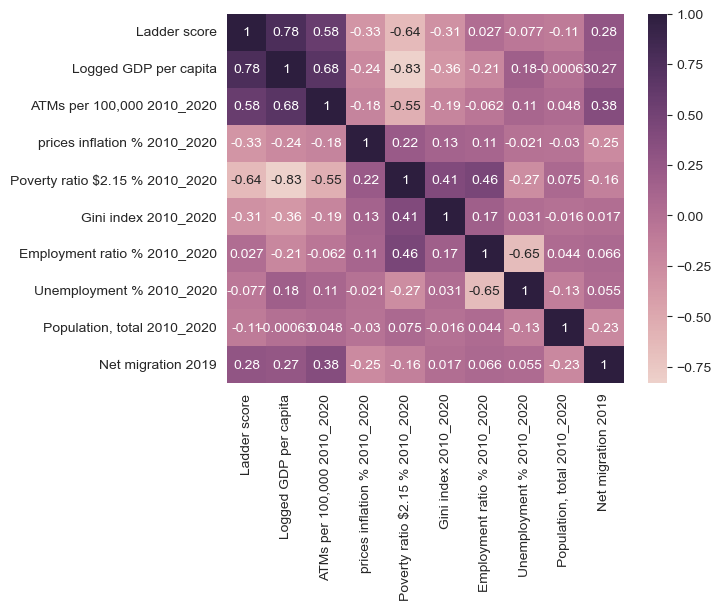

In [181]:
corrmat = wealth_indicators.corr()
sb.heatmap(corrmat, cmap=sb.cubehelix_palette(as_cmap=True), annot=True)

<AxesSubplot:>

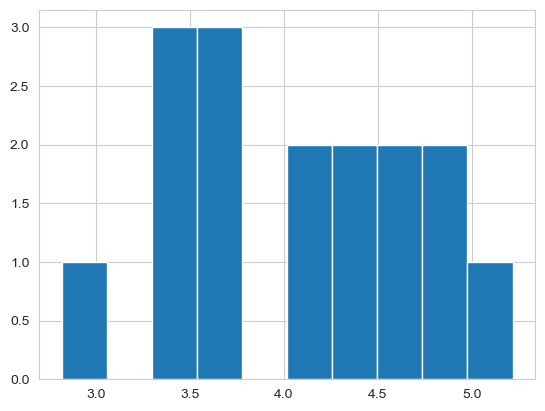

In [173]:
wealth_indicators[wealth_indicators['Poverty ratio $2.15 % 2010_2020'] > 50 ]['Ladder score'].hist()

<AxesSubplot:>

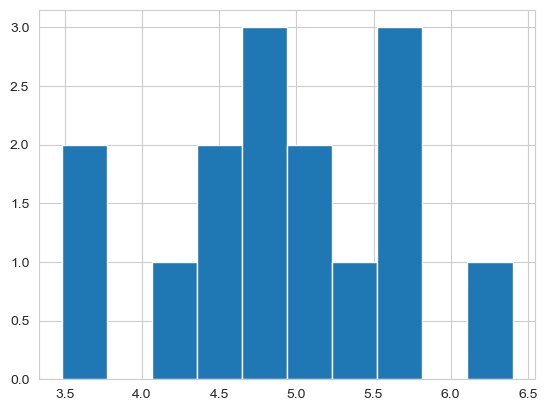

In [177]:
wealth_indicators[wealth_indicators['Unemployment % 2010_2020'] > 20 ]['Ladder score'].hist()

<AxesSubplot:>

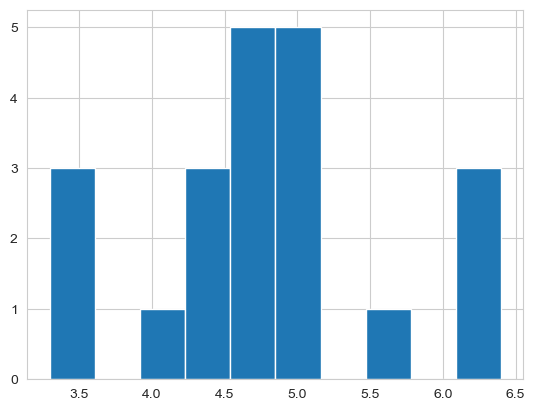

In [184]:
wealth_indicators[wealth_indicators['Net migration 2019'] < -50000]['Ladder score'].hist()

<AxesSubplot:xlabel='Ladder score', ylabel='Net migration 2019'>

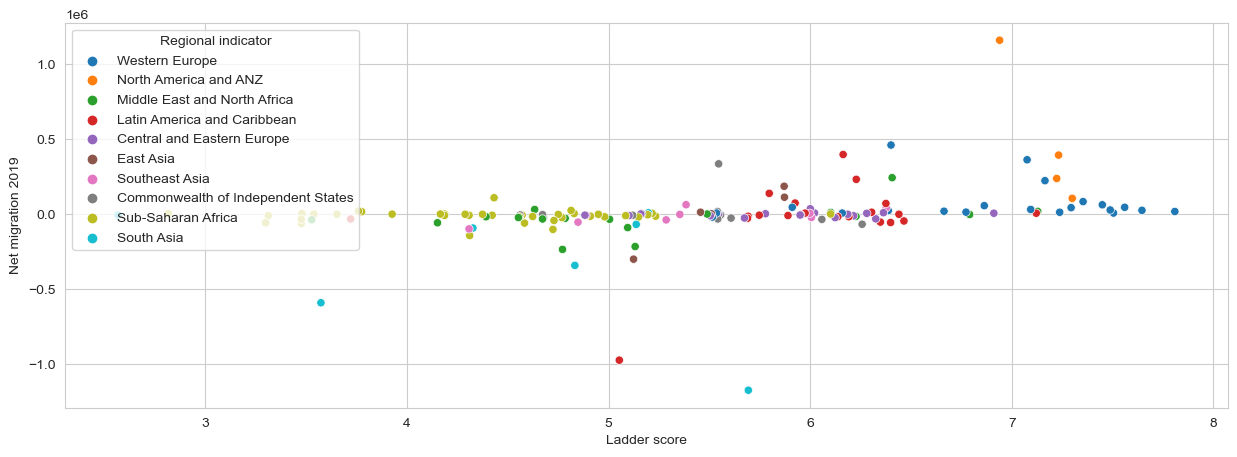

In [187]:
plt.figure(figsize=(15, 5))
sb.scatterplot(x = wealth_indicators['Ladder score'],
               y = wealth_indicators['Net migration 2019'],
               hue= wealth_indicators['Regional indicator']
               )

<h2> GDP vs Ladder score </h2>

In [188]:
gdpdf = pd.read_csv('AnalysisData\\GDP_en_csv_v2_4696300.csv')
migrationdf = pd.read_csv('AnalysisData\\API_SM.POP.NETM_DS2_en_csv_v2_4770395.csv', skiprows=3)

In [210]:
happiness2011_2018 = happinessScores.iloc[:, [0, 1, 8, 9, 10, 11, 12, 13, 14, 15]].dropna()

In [219]:
happinessScoresNoNulls[happinessScoresNoNulls['LadderScore2014'] < 4.2]

,Country name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018
13,Benin,BEN,3.870280,3.193469,3.479413,3.347419,3.624664,4.007358,4.853181,5.819827
17,Botswana,BWA,3.519921,4.835939,4.128299,4.031197,3.761965,3.498937,3.504881,3.461366
19,Bulgaria,BGR,3.875382,4.222297,3.993021,4.438440,4.865401,4.837561,5.096902,5.098814
22,Cambodia,KHM,4.161225,3.898707,3.674467,3.883306,4.162165,4.461259,4.585842,5.121838
42,Egypt,EGY,4.174159,4.204157,3.558520,4.885073,4.762538,4.556741,3.929344,4.005451
55,Guinea,GIN,4.044569,3.651555,3.901793,3.412483,3.504694,3.602855,4.873723,5.252227
88,Malawi,MWI,3.946063,4.279270,4.035084,4.563080,3.867638,3.476493,3.416863,3.334634
102,Nepal,NPL,3.809445,4.233245,4.604577,4.975015,4.812437,5.099540,4.736692,4.910087
122,Rwanda,RWA,4.097436,3.333048,3.466388,3.595678,3.483109,3.332990,3.108374,3.561047
124,Senegal,SEN,3.834202,3.668737,3.647367,4.394777,4.617001,4.594534,4.683025,4.769377


In [340]:
#Is there a country with drastic change in happiness score?
happinessScoresNoNulls[happinessScoresNoNulls['LadderScore2015'] < 3.4]

,Country name,Country Code,LadderScore2014,LadderScore2015,LadderScore2016,LadderScore2017,LadderScore2018
61,Liberia,LBR,4.571419,2.701591,3.354676,4.424491,4.134853
118,Yemen,YEM,3.967958,2.982674,3.825631,3.253560,3.057514


In [358]:
#Is there a country with drastic change in happiness score? there shouldn't if the measure is valid
happinessScoresNoNulls[happinessScoresNoNulls['LadderScore2018'] > 7.4]

,Country name,Country Code,LadderScore2014,LadderScore2015,LadderScore2016,LadderScore2017,LadderScore2018
29,Denmark,DNK,7.507559,7.514425,7.557783,7.593702,7.648786
36,Finland,FIN,7.384571,7.447926,7.659843,7.788252,7.858107
76,Netherlands,NLD,7.321188,7.324437,7.540877,7.458965,7.463097
80,Norway,NOR,7.444471,7.603434,7.596332,7.578745,7.444262
101,Switzerland,CHE,7.492804,7.572137,7.458520,7.473593,7.508587


In [142]:
#Lets write a code to determine changes with more than one points in general, to just the top 10 or lowest ten
happinessScoresNoNulls[happinessScoresNoNulls['LadderScore2018'] - happinessScoresNoNulls['LadderScore2014'] < -1 ]


,Country name,Country Code,LadderScore2014,LadderScore2015,LadderScore2016,LadderScore2017,LadderScore2018
66,Malawi,MWI,4.563080,3.867638,3.476493,3.416863,3.334634
108,Turkmenistan,TKM,5.787379,5.791460,5.887052,5.229149,4.620602
116,Venezuela,VEN,6.136096,5.568800,4.041115,5.070751,5.005663


In [602]:
#Lets write a code to determine changes with more than one points in general, to just the top 10 or lowest ten
happinessScoresNoNulls[happinessScoresNoNulls['LadderScore2018'] - happinessScoresNoNulls['LadderScore2014'] < -1 ]


,Country name,Country Code,LadderScore2014,LadderScore2015,LadderScore2016,LadderScore2017,LadderScore2018
66,Malawi,MWI,4.563080,3.867638,3.476493,3.416863,3.334634
108,Turkmenistan,TKM,5.787379,5.791460,5.887052,5.229149,4.620602
116,Venezuela,VEN,6.136096,5.568800,4.041115,5.070751,5.005663


In [348]:
def plot_ladder_score_series(country, start_year = 2):
    plt.plot(
        happinessScores.groupby('Country name').get_group(country).iloc[:, start_year:].melt( var_name = 'Year', value_name = 'Ladder score')['Year'],
        happinessScores.groupby('Country name').get_group(country).iloc[:, start_year:].melt( var_name = 'Year', value_name = 'Ladder score')['Ladder score'], '-^', label = country)
    plt.xticks( happinessScores.groupby('Country name').get_group(country).iloc[:, start_year:].melt( var_name = 'Year', value_name = 'Ladder score')['Year'], fontsize = 14 )
    plt.yticks( [3,4, 5, 6, 7], fontsize = 14 )
    plt.xlabel('Years', fontsize = 14)
    plt.ylabel('Ladder score', fontsize = 14)

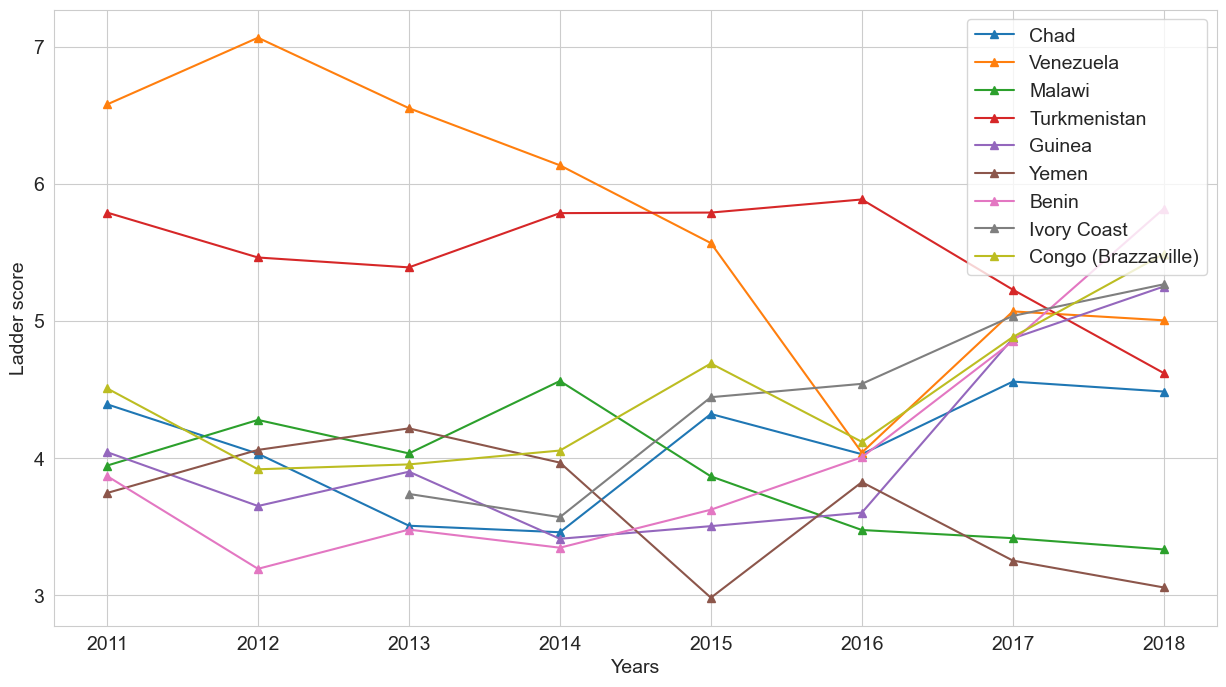

In [1126]:
#plot all the countries with big changes as a line plot before the casaulity analysis
plt.figure(figsize=(15, 8))

plot_ladder_score_series('Chad', 8)
plot_ladder_score_series('Venezuela', 8)
plot_ladder_score_series('Malawi', 8)
plot_ladder_score_series('Turkmenistan', 8)
plot_ladder_score_series('Guinea', 8)
plot_ladder_score_series('Yemen', 8)
#plot_ladder_score_series('Senegal', 8)
#plot_ladder_score_series('Cameroon', 8)
plot_ladder_score_series('Benin', 8)
plot_ladder_score_series('Ivory Coast', 8)
plot_ladder_score_series('Congo (Brazzaville)', 8)
#plot_ladder_score_series('Cambodia', 8)

plt.legend(fontsize = 14)
plt.savefig('media4.0\\sad_ladder_score_changes.jpg', bbox_inches = 'tight')

#gdpdf.groupby('Country Name').get_group('Chad').iloc[:, 49:63].melt( var_name = 'Year', value_name = 'gdp' ).plot()

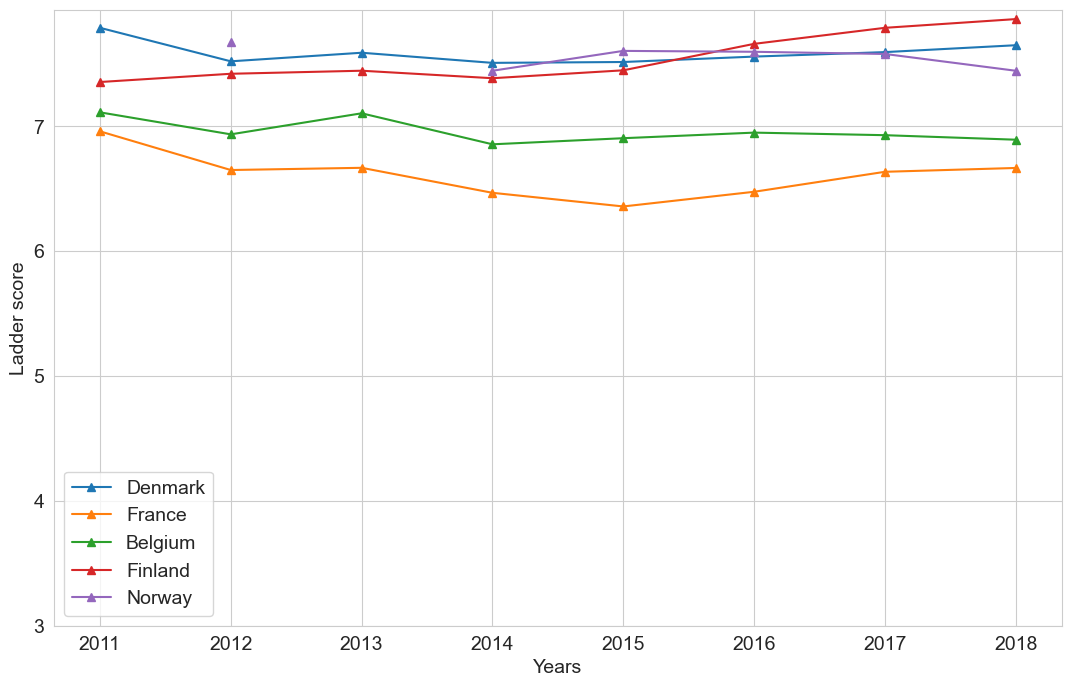

In [360]:
plt.figure(figsize=(13, 8))

plot_ladder_score_series('Denmark', 8)
plot_ladder_score_series('France', 8)
plot_ladder_score_series('Belgium', 8)
plot_ladder_score_series('Finland', 8)
plot_ladder_score_series('Norway', 8)

plt.legend(fontsize = 14)
plt.savefig('media4.0\\happy_ladder_score_changes.jpg', bbox_inches = 'tight')

<h2> Causality Analysis </h2>
<p> Perform causality analysis between ladder score and gdp for countries whose Ladder score changed by 2 scores in the previous section </p>

In [361]:
from statsmodels.tsa.stattools import grangercausalitytests

In [630]:
corruptiondf = pd.read_csv('AnalysisData\\perception_of_corruption2005-1018.csv', index_col = 0)
povertydf = pd.read_csv('worldData\\API_SI.POV.DDAY_DS2_en_csv_v2_4772265.csv', skiprows=3)
gindf = pd.read_csv('worldData\\API_SI.POV.GINI_DS2_en_csv_v2_4770433.csv', skiprows= 3)

In [465]:
#use any dataframe from world bank data
def get_causal_data( df, country_code, val_name):
    data = pd.merge(
        happinessScores.groupby('Country Code').get_group(country_code).iloc[:, 2:].melt( var_name = 'Year', value_name = 'Ladder score' ),
        df.groupby('Country Code').get_group(country_code).iloc[:, 49:64].melt( var_name = 'Year', value_name = val_name), how = 'outer').dropna()
    return data

In [573]:
def plot_for_causal_data(data, col_name):
    plt.plot(data['Year'],
          [val/max(data[col_name]) for val in data[col_name]], color = '#00cc00',  label = 'Normalized ' + col_name
             )
    plt.plot( data['Year'],
          [score/max(data['Ladder score']) for score in data['Ladder score']], color = '#003399', label = 'Normalized Ladder score'
          )
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.5)

In [708]:
#tcd for chad
data = get_causal_data(gdpdf, 'TCD', 'Gdp per capita')
data.head(2)


,Year,Ladder score,Gdp per capita
1,2006,3.434801,1572.482178
2,2007,4.141327,1569.748832


In [709]:
#test wether the second column granger cause the first coulumn
gc_res = grangercausalitytests(data[['Ladder score', 'Gdp per capita']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2141  , p=0.6546  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=0.2854  , p=0.5932  , df=1
likelihood ratio test: chi2=0.2821  , p=0.5953  , df=1
parameter F test:         F=0.2141  , p=0.6546  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7419  , p=0.1426  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=10.0536 , p=0.0066  , df=2
likelihood ratio test: chi2=7.1410  , p=0.0281  , df=2
parameter F test:         F=2.7419  , p=0.1426  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5382  , p=0.2322  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=25.3822 , p=0.0000  , df=3
likelihood ratio test: chi2=12.6362 , p=0.0055  , df=3
parameter F test:         F=2.5382  , p=0.2322  , df_denom=3, df_num=3


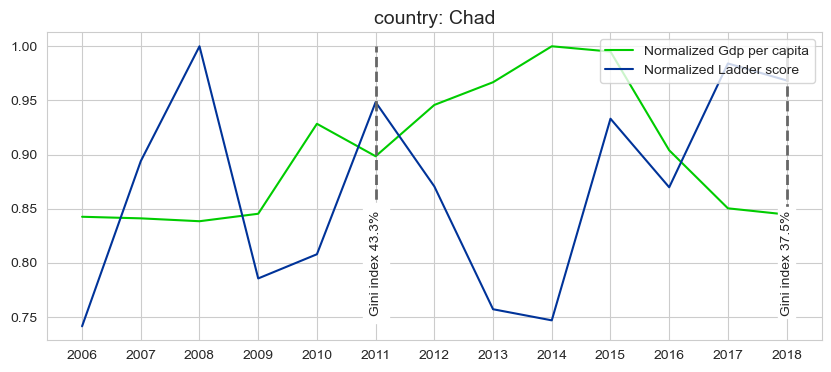

In [765]:
plt.figure(figsize=(10, 4))
plt.title('country: Chad', fontsize = 14)
plot_for_causal_data(data, 'Gdp per capita')
plt.vlines(x=['2011', '2018'], ymin=0.75, ymax=1, colors='#666666', ls='--', lw=2)
plt.text(5, 0.8, 'Gini index 43.3%', ha='center', va='center',rotation='vertical', bbox={'facecolor':'white', 'pad':5})
plt.text(12, 0.8, 'Gini index 37.5%', ha='center', va='center',rotation='vertical', bbox={'facecolor':'white', 'pad':2})
plt.savefig('media4.0\\causal_chad.jpg', bbox_inches = 'tight')

In [578]:
data = get_causal_data(migrationdf, 'VEN', 'Net Migration')

In [579]:
gc_res = grangercausalitytests(data[['Ladder score', 'Net Migration']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0176  , p=0.8973  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=0.0235  , p=0.8781  , df=1
likelihood ratio test: chi2=0.0235  , p=0.8782  , df=1
parameter F test:         F=0.0176  , p=0.8973  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2850  , p=0.1829  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=8.3783  , p=0.0152  , df=2
likelihood ratio test: chi2=6.2288  , p=0.0444  , df=2
parameter F test:         F=2.2850  , p=0.1829  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.5041  , p=0.0975  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=55.0414 , p=0.0000  , df=3
likelihood ratio test: chi2=18.7244 , p=0.0003  , df=3
parameter F test:         F=5.5041  , p=0.0975  , df_denom=3, df_num=3


In [580]:
data['Net Migration'] = abs(data['Net Migration'])
data

,Year,Ladder score,Net Migration
0,2005,7.169621,18400.0
1,2006,6.525146,27239.0
3,2008,6.257771,43636.0
4,2009,7.188803,50286.0
5,2010,7.478455,52784.0
6,2011,6.579789,54377.0
7,2012,7.066577,55130.0
8,2013,6.552796,57815.0
9,2014,6.136096,62437.0
10,2015,5.568800,77421.0


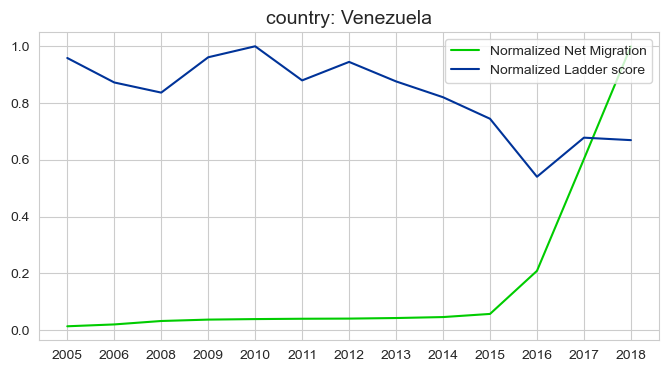

In [581]:
plt.figure(figsize=(8, 4))
plt.title('country: Venezuela', fontsize = 14)
plot_for_causal_data(data, 'Net Migration')
plt.savefig('media4.0\\causal_venzuela.jpg', bbox_inches = 'tight')

In [1127]:
data = get_causal_data(gdpdf, 'BEN', 'GDP per capita')
data.head()

,Year,Ladder score,GDP per capita
1,2006,3.329802,2606.817449
3,2008,3.667140,2738.194385
6,2011,3.870280,2707.869700
7,2012,3.193469,2759.848256
8,2013,3.479413,2876.903909


In [1128]:
gc_res = grangercausalitytests(data[['Ladder score', 'GDP per capita']], 2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3774  , p=0.2850  , df_denom=6, df_num=1
ssr based chi2 test:   chi2=2.0662  , p=0.1506  , df=1
likelihood ratio test: chi2=1.8600  , p=0.1726  , df=1
parameter F test:         F=1.3774  , p=0.2850  , df_denom=6, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8351  , p=0.3016  , df_denom=3, df_num=2
ssr based chi2 test:   chi2=9.7869  , p=0.0075  , df=2
likelihood ratio test: chi2=6.3922  , p=0.0409  , df=2
parameter F test:         F=1.8351  , p=0.3016  , df_denom=3, df_num=2


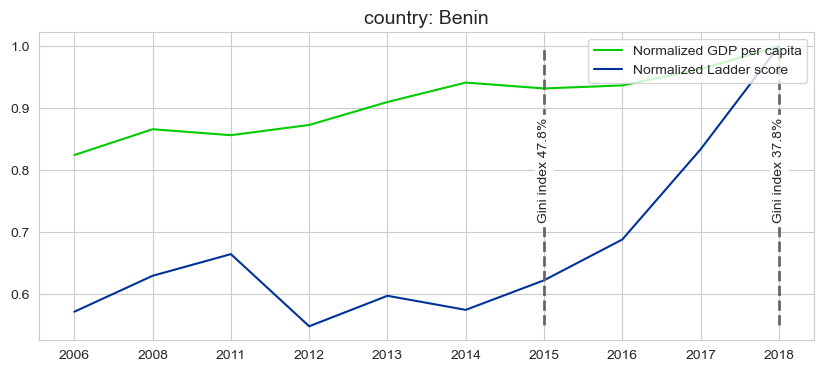

In [1130]:
plt.figure(figsize=(10, 4))
plt.title('country: Benin', fontsize = 14)
plot_for_causal_data(data, 'GDP per capita')

plt.vlines(x=[ '2015', '2018'], ymin=0.55, ymax=1, colors='#666666', ls='--', lw=2)

plt.text(6, 0.8, 'Gini index 47.8%', ha='center', va='center',rotation='vertical', bbox={'facecolor':'white', 'pad':2})
plt.text(9, 0.8, 'Gini index 37.8%', ha='center', va='center',rotation='vertical', bbox={'facecolor':'white', 'pad':2})
plt.savefig('media4.0\\causal_benin.jpg', bbox_inches = 'tight')

In [1131]:
data = get_causal_data(gdpdf, 'MWI', 'GDP per capita')
data.head(2)

,Year,Ladder score,GDP per capita
1,2006,3.829868,1127.871699
2,2007,4.891037,1202.040730


In [1132]:
gc_res = grangercausalitytests(data[['Ladder score', 'GDP per capita']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.7480 , p=0.0110  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=16.7829 , p=0.0000  , df=1
likelihood ratio test: chi2=9.8518  , p=0.0017  , df=1
parameter F test:         F=11.7480 , p=0.0110  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8572  , p=0.2688  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=8.3575  , p=0.0153  , df=2
likelihood ratio test: chi2=5.9112  , p=0.0520  , df=2
parameter F test:         F=1.8572  , p=0.2688  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1703  , p=0.9061  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=4.0884  , p=0.2521  , df=3
likelihood ratio test: chi2=3.3024  , p=0.3473  , df=3
parameter F test:         F=0.1703  , p=0.9061  , df_denom=1, df_num=3


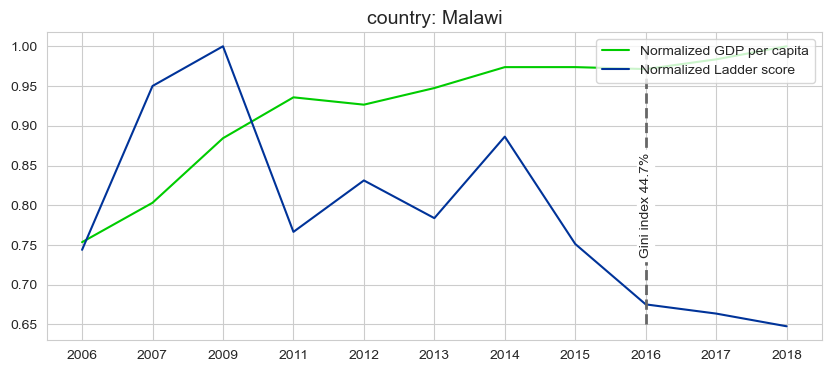

In [800]:
plt.figure(figsize=(10, 4))
plt.title('country: Malawi', fontsize = 14)
plot_for_causal_data(data, 'GDP per capita')

plt.vlines(x=[ '2016'], ymin=0.65, ymax=1, colors='#666666', ls='--', lw=2)
plt.text(8, 0.8, 'Gini index 44.7%', ha='center', va='center',rotation='vertical', bbox={'facecolor':'white', 'pad':2})

plt.savefig('media4.0\\causal_malawi.jpg', bbox_inches = 'tight')

In [595]:
data = get_causal_data(gdpdf, 'GIN', 'GDP per capita')
data.head()

,Year,Ladder score,GDP per capita
6,2011,4.044569,1932.505740
7,2012,3.651555,2002.321610
8,2013,3.901793,2035.318549
9,2014,3.412483,2061.694838
10,2015,3.504694,2087.934946


In [596]:
gc_res = grangercausalitytests(data[['Ladder score', 'GDP per capita']], 2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.2525 , p=0.0328  , df_denom=4, df_num=1
ssr based chi2 test:   chi2=17.9419 , p=0.0000  , df=1
likelihood ratio test: chi2=8.8945  , p=0.0029  , df=1
parameter F test:         F=10.2525 , p=0.0328  , df_denom=4, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=24.2834 , p=0.1420  , df_denom=1, df_num=2
ssr based chi2 test:   chi2=291.4012, p=0.0000  , df=2
likelihood ratio test: chi2=23.4199 , p=0.0000  , df=2
parameter F test:         F=24.2834 , p=0.1420  , df_denom=1, df_num=2


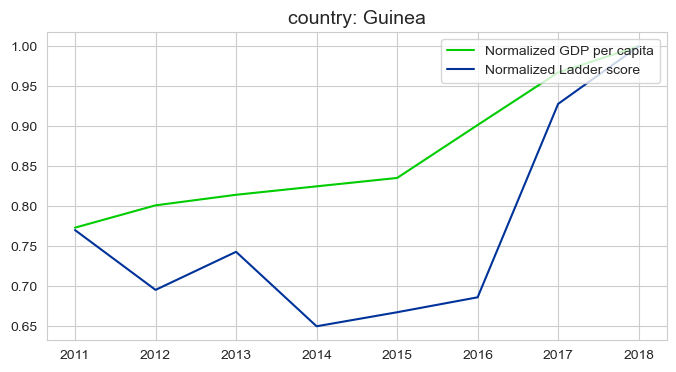

In [597]:
plt.figure(figsize=(8, 4))
plt.title('country: Guinea', fontsize = 14)
plot_for_causal_data(data, 'GDP per capita')
plt.savefig('media4.0\\causal_guinea.jpg', bbox_inches = 'tight')

In [801]:
data = get_causal_data(gdpdf, 'CIV', 'GDP per capita')
data.head()

,Year,Ladder score,GDP per capita
4,2009,4.197182,3619.579175
8,2013,3.739366,3961.828568
9,2014,3.570369,4225.955764
10,2015,4.445039,4417.150215
11,2016,4.542546,4615.709257


In [802]:
gc_res = grangercausalitytests(data[['Ladder score', 'GDP per capita']], 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8523 , p=0.0412  , df_denom=3, df_num=1
ssr based chi2 test:   chi2=23.7046 , p=0.0000  , df=1
likelihood ratio test: chi2=9.5973  , p=0.0019  , df=1
parameter F test:         F=11.8523 , p=0.0412  , df_denom=3, df_num=1


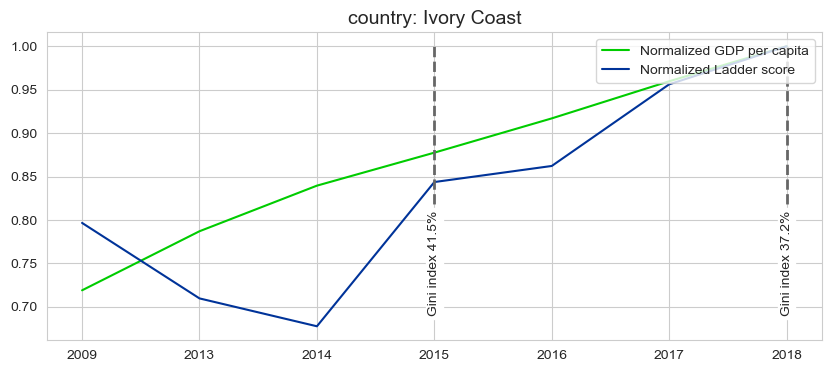

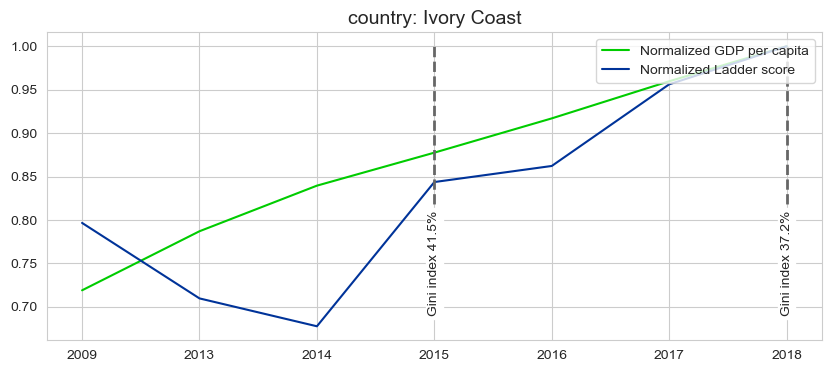

In [811]:
plt.figure(figsize=(10, 4))
plt.title('country: Ivory Coast', fontsize = 14)
plot_for_causal_data(data, 'GDP per capita')

plt.vlines(x=[ '2015', '2018'], ymin=0.7, ymax=1, colors='#666666', ls='--', lw=2)

plt.text(3, 0.75, 'Gini index 41.5%', ha='center', va='center',rotation='vertical', bbox={'facecolor':'white', 'pad':2})
plt.text(6, 0.75, 'Gini index 37.2%', ha='center', va='center',rotation='vertical', bbox={'facecolor':'white', 'pad':2})

plt.savefig('media4.0\\causal_ivorycoast.jpg', bbox_inches = 'tight')

In [603]:
data = get_causal_data(gdpdf, 'TKM', 'GDP per capita')
data.head()

,Year,Ladder score,GDP per capita
4,2009,6.567713,8015.809617
6,2011,5.791755,9717.641886
7,2012,5.463827,10604.000410
8,2013,5.391763,11471.184080
9,2014,5.787379,12421.369770


In [606]:
gc_res = grangercausalitytests(data[['Ladder score', 'GDP per capita']], 2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3127  , p=0.6001  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=0.5004  , p=0.4793  , df=1
likelihood ratio test: chi2=0.4853  , p=0.4860  , df=1
parameter F test:         F=0.3127  , p=0.6001  , df_denom=5, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3238  , p=0.4303  , df_denom=2, df_num=2
ssr based chi2 test:   chi2=9.2669  , p=0.0097  , df=2
likelihood ratio test: chi2=5.9026  , p=0.0523  , df=2
parameter F test:         F=1.3238  , p=0.4303  , df_denom=2, df_num=2


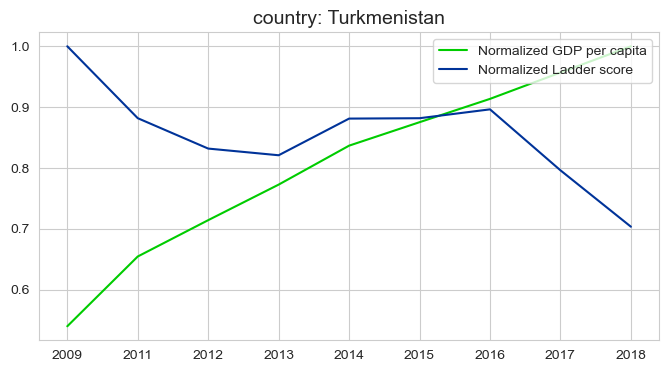

In [607]:
plt.figure(figsize=(8, 4))
plt.title('country: Turkmenistan', fontsize = 14)
plot_for_causal_data(data, 'GDP per capita')
plt.savefig('media4.0\\causal_turkmenistan.jpg', bbox_inches = 'tight')

In [770]:
data = get_causal_data(povertydf, 'MWI', 'Gini Index')
data

,Year,Ladder score,Gini Index
11,2016,3.476493,65.7


In [705]:
data = get_causal_data(gindf, 'TCD', 'Gini Index')
data

,Year,Ladder score,Gini Index
6,2011,4.393482,43.3
13,2018,4.486325,37.5


In [772]:
data = get_causal_data(gindf, 'BEN', 'Gini Index')
data

,Year,Ladder score,Gini Index
6,2011,3.870280,43.4
10,2015,3.624664,47.8
13,2018,5.819827,37.8


In [1121]:
#tcd for chad
data = get_causal_data(gdpdf, 'COG', 'Gdp per capita')
data.head(2)
#test wether the second column granger cause the first coulumn
gc_res = grangercausalitytests(data[['Ladder score', 'Gdp per capita']], 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6443  , p=0.0837  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=7.4309  , p=0.0064  , df=1
likelihood ratio test: chi2=5.2554  , p=0.0219  , df=1
parameter F test:         F=4.6443  , p=0.0837  , df_denom=5, df_num=1


<h2> PCA </h2>

In [844]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [845]:
happiness_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      154 non-null    object 
 1   Country Code                      154 non-null    object 
 2   Regional indicator                154 non-null    object 
 3   Ladder score                      154 non-null    float64
 4   Standard error of ladder score    154 non-null    float64
 5   upperwhisker                      154 non-null    float64
 6   lowerwhisker                      154 non-null    float64
 7   Logged GDP per capita             154 non-null    float64
 8   Social support                    154 non-null    float64
 9   Healthy life expectancy           154 non-null    float64
 10  Freedom to make life choices      154 non-null    float64
 11  Generosity                        154 non-null    float64
 12  Percepti

In [860]:
data = happiness_money.iloc[:, [0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 14, 15, 17, 18, 21]].dropna()
data

,Country name,Country Code,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,"ATMs per 100,000 2010_2020",prices inflation % 2010_2020,Gini index 2010_2020,Employment ratio % 2010_2020,Urban population % 2010_2020
0,Finland,FIN,Western Europe,7.8087,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,38.274286,4.065954,28.3,57.563999,85.446
1,Denmark,DNK,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,70.392330,3.416268,28.7,63.359001,87.994
2,Switzerland,CHE,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,99.282417,2.426041,34.3,65.905998,73.849
3,Iceland,ISL,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,111.294437,12.694394,31.8,75.432999,93.855
4,Norway,NOR,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,59.929475,3.753931,31.6,65.700996,82.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Tanzania,TZA,Sub-Saharan Africa,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,5.836364,16.001094,40.5,85.433998,34.500
149,Central African Republic,CAF,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.375747,14.898684,56.2,67.973000,41.770
150,Rwanda,RWA,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,5.744230,15.438214,52.0,84.151001,17.313
151,Zimbabwe,ZWE,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,7.942945,255.304991,50.3,80.511002,34.294


In [861]:
X = data.iloc[:, 4:] #skip country and ladder score columns
y = data.iloc[:, 3] #ladder score col

scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)

In [862]:
pca = PCA(3)
pca.fit(X_std)
pca.explained_variance_ratio_
#cumsum = np.cumsum(pca.explained_variance_ratio_)
#d = np.argmax(cumsum >= 0.85) + 1

array([0.44593864, 0.17887206, 0.10302884])

In [863]:
x_reduced = pca.fit_transform(X)

<AxesSubplot:>

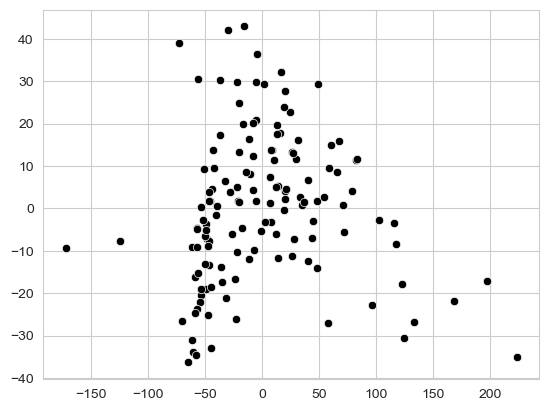

In [864]:
sb.scatterplot(x = x_reduced.T[0], y = x_reduced.T[2],
             color='black')

C:\Users\eilaf\anaconda3\envs\datakougi\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


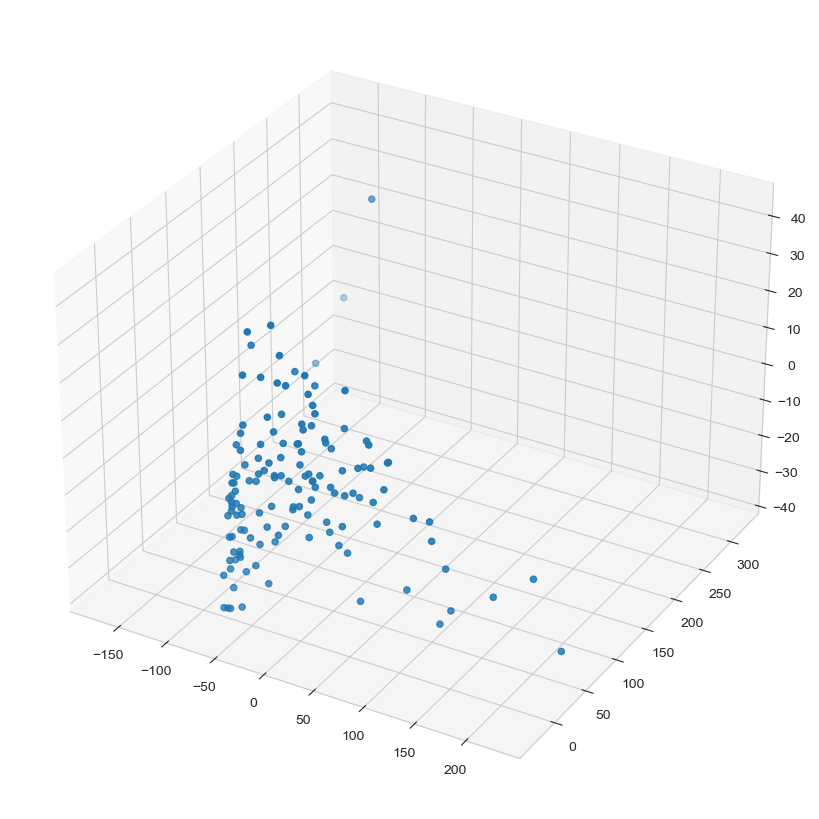

In [865]:
datax = x_reduced.T[0]
datay = x_reduced.T[1]
dataz = x_reduced.T[2]
#labels_ = sampled.map(lambda x: cluster.predict(x)) not working
#labels = kmeans.predict(sampled)

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)

ax.scatter(datax, datay, dataz )
           #c = labels)

<h2> k_means Clustering </h2>

In [1023]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [1139]:
data = happiness_money.iloc[:, [0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 14, 15, 17, 19, 21]].dropna()
scaler = StandardScaler()
X = data.iloc[:, 4:] #skip country and ladder score columns
y = data.iloc[:, 3] #ladder score col

scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)

Xt = np.matrix.transpose(X_std)

scaled_data = pd.DataFrame( dict(zip(data.columns[4:], Xt)) )

In [1152]:
scaled_data.columns

Index(['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'ATMs per 100,000 2010_2020',
       'prices inflation % 2010_2020', 'Gini index 2010_2020',
       'Unemployment % 2010_2020', 'Urban population % 2010_2020'],
      dtype='object')

In [1159]:
def plot_elbow(num_of_cluster):
    distortions = [] # sum of squared error within each cluster
    for i in range(1, num_of_cluster):
        km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
        km.fit(scaled_data)
        distortions.append(km.inertia_)

    plt.plot(range(1,num_of_cluster), distortions, color = '#660066', marker='o', alpha=0.5)
    plt.xlabel('Number of clusters', fontsize = 14)
    plt.ylabel('Distortions', fontsize = 14)


In [1160]:
def plot_silhouette(num_of_cluster):
    distortions = [] # sum of squared error within each cluster
    for i in range(2, num_of_cluster):
        km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
        km.fit(scaled_data)
        distortions.append( silhouette_score(scaled_data, km.labels_) )

    plt.plot(range(2,num_of_cluster), distortions, color = '#660066', marker='o', alpha=0.5)
    plt.xlabel('Number of clusters', fontsize = 14)
    plt.ylabel('Silhouette score', fontsize = 14)


C:\Users\eilaf\anaconda3\envs\datakougi\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


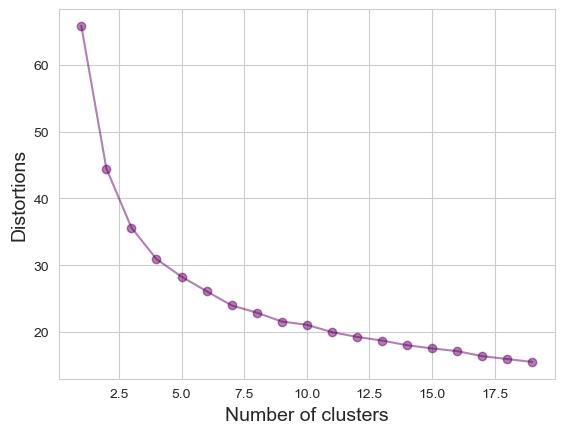

In [1161]:
plot_elbow(20)
plt.savefig('media4.0\\cluster_elbow.jpg', bbox_inches = 'tight')

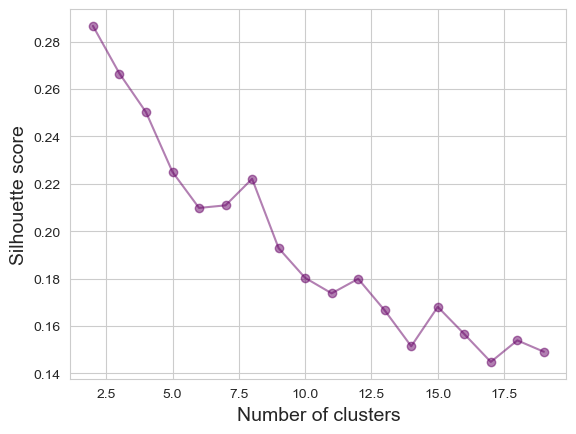

In [1162]:
plot_silhouette(20)
plt.savefig('media4.0\\cluster_silhiote.jpg', bbox_inches = 'tight')
#silhouette_score(scaled_data, kmeans.labels_)

In [1147]:
k = 4
kmeans = KMeans(n_clusters = k, init='k-means++', n_init = 10, max_iter=1000, random_state=0)
y_pred = kmeans.fit_predict(scaled_data)
pd.value_counts(y_pred)

1    43
0    43
3    30
2    22
dtype: int64

In [1109]:
# #plot the data in 3D with 3 features
# sampled = scaled_data.sample(replace = False, frac = 1)
# datax = sampled['Gini index 2010_2020']
# datay = sampled['Logged GDP per capita']
# dataz = sampled['Ladder score']
# #labels_ = sampled.map(lambda x: cluster.predict(x)) not working
# labels = kmeans.predict(sampled)
#
# fig = plt.figure(figsize = (8,8))
# ax = Axes3D(fig)
#
# ax.scatter(datax, datay, dataz,  c = labels)
# ax.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0],
#            kmeans.cluster_centers_[:,2], marker = '*', color = 'red')
#
# ax.set_xlabel('Gini')
# ax.set_ylabel('Logged GDP per capita')
# ax.set_zlabel('Healthy life expectancy')
# ax.set_title('Cluster of three features')

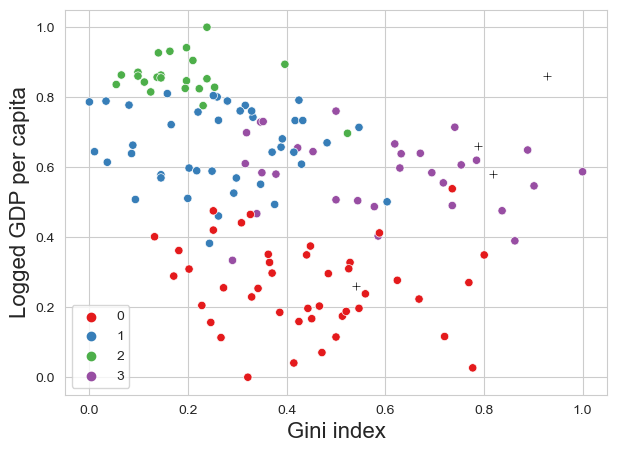

In [1149]:
fig = plt.figure(figsize = (7,5))

labels = kmeans.predict(scaled_data)
sb.scatterplot(x = kmeans.cluster_centers_[:,1], y = kmeans.cluster_centers_[:,0],
               marker='+', color='black')
sb.scatterplot(x = scaled_data['Gini index 2010_2020'], y = scaled_data['Logged GDP per capita'], hue= labels, palette=sb.color_palette("Set1", n_colors=k)) #n_colors = k
plt.xlabel('Gini index', fontsize = 16)
plt.ylabel('Logged GDP per capita', fontsize = 16)
fig.savefig('media4.0\\cluster_scatter_gdp_gini.jpg', bbox_inches = 'tight')

In [1150]:
clusters=pd.DataFrame(data, columns=data.columns)
clusters['label']=kmeans.labels_

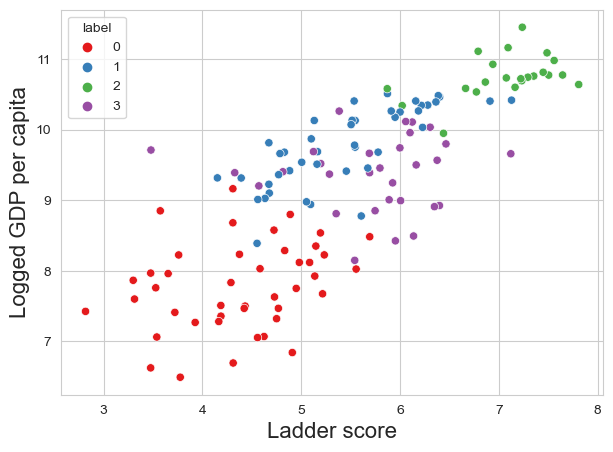

In [1151]:
fig = plt.figure(figsize = (7,5))

#sb.scatterplot(x = kmeans.cluster_centers_[:,1], y = kmeans.cluster_centers_[:,0],
#               marker='+', color='black')
sb.scatterplot(y = clusters['Logged GDP per capita'], x = clusters['Ladder score'],
               hue= clusters['label'],
               palette=sb.color_palette("Set1", n_colors=k))
plt.xlabel('Ladder score', fontsize = 16)
plt.ylabel('Logged GDP per capita', fontsize = 16)
fig.savefig('media4.0\\cluster_scatter_gdp_ladder.jpg', bbox_inches = 'tight')

In [1085]:
clusters.groupby('label').std()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,"ATMs per 100,000 2010_2020",prices inflation % 2010_2020,Gini index 2010_2020,Employment ratio % 2010_2020,Urban population % 2010_2020
label,,,,,,,,,,,,
0,0.687612,0.698602,0.088114,3.770434,0.082748,0.099557,0.095488,35.265732,41.737319,5.314943,8.243489,14.744061
1,0.688694,0.570204,0.041354,3.854328,0.052152,0.154077,0.060419,41.750764,8.841321,8.020239,7.342414,15.809155
2,0.597569,0.302022,0.039952,1.926460,0.080381,0.130835,0.193763,63.404305,2.856228,4.420642,5.810382,11.265738
3,0.668864,0.648933,0.099031,4.240624,0.107084,0.140606,0.118798,7.986362,69.289374,6.789227,12.287172,13.663851


In [1069]:
clusters.groupby('label').get_group(3)

,Country name,Country Code,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,"ATMs per 100,000 2010_2020",prices inflation % 2010_2020,Gini index 2010_2020,Employment ratio % 2010_2020,Urban population % 2010_2020,label
14,Costa Rica,CRI,Latin America and Caribbean,7.1214,9.658156,0.901546,71.299850,0.934739,-0.102430,0.786332,78.798834,13.798295,50.6,59.770000,80.076,3
24,Mexico,MEX,Latin America and Caribbean,6.4650,9.797797,0.838665,68.299026,0.858709,-0.175267,0.806822,61.537824,6.041457,50.1,58.008999,80.444,3
29,Guatemala,GTM,Latin America and Caribbean,6.3989,8.924806,0.816621,64.808945,0.908148,-0.042939,0.783237,37.909262,11.355761,54.6,61.236000,51.439,3
32,Brazil,BRA,Latin America and Caribbean,6.3756,9.566435,0.896724,66.480164,0.799805,-0.101812,0.770601,118.436602,9.029901,56.5,60.120998,86.824,3
34,El Salvador,SLV,Latin America and Caribbean,6.3483,8.909076,0.806092,66.108261,0.833805,-0.121073,0.754320,37.239496,6.707923,48.5,58.151001,72.746,3
36,Panama,PAN,Latin America and Caribbean,6.3048,10.034234,0.902094,69.603012,0.880367,-0.153928,0.851589,73.650468,8.758683,54.8,62.423000,68.059,3
39,Chile,CHL,Latin America and Caribbean,6.2285,10.032055,0.879714,69.900620,0.744896,-0.065668,0.838239,67.542047,8.716269,47.3,56.021000,87.643,3
43,Poland,POL,Central and Eastern Europe,6.1863,10.265124,0.874257,69.311134,0.862056,-0.205084,0.686927,72.453007,4.239401,38.0,54.356998,61.564,3
44,Colombia,COL,Latin America and Caribbean,6.1634,9.500369,0.884440,67.699585,0.836180,-0.161236,0.864572,42.433988,7.513460,55.3,63.713001,81.104,3
45,Cyprus,CYP,Western Europe,6.1590,10.405703,0.805996,73.702225,0.779858,0.043731,0.856272,71.759553,4.669008,37.0,61.866001,68.410,3


<AxesSubplot:>

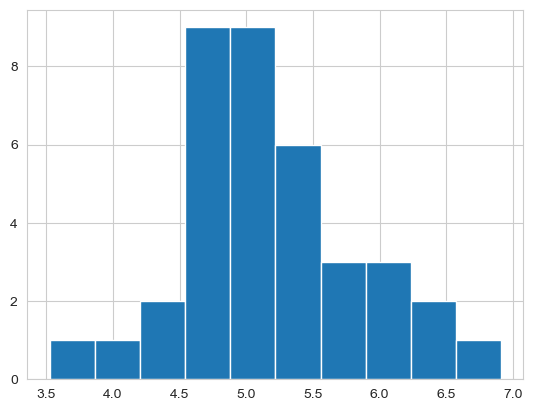

In [1084]:
clusters.groupby('label').get_group(0)['Ladder score'].hist()

In [1048]:
clusters.groupby('label').std()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,"ATMs per 100,000 2010_2020",prices inflation % 2010_2020,Gini index 2010_2020,Employment ratio % 2010_2020,Urban population % 2010_2020
label,,,,,,,,,,,,
0,0.723956,0.543595,0.056876,3.687604,0.043520,0.159742,0.066510,37.381393,8.977609,8.108926,7.538472,15.395470
1,0.571000,0.307905,0.033344,1.932637,0.057492,0.132776,0.186184,55.421824,2.967706,4.564457,5.828696,11.719646
2,0.684279,0.623256,0.115800,4.094358,0.113087,0.126866,0.142647,5.973394,86.898535,6.371902,6.634611,13.080367
3,0.663255,0.545394,0.082830,3.553927,0.076432,0.101204,0.084014,54.657351,41.953838,5.633580,8.533539,12.274858
4,0.662299,0.534228,0.081134,4.682849,0.101641,0.153656,0.072005,8.976753,7.143497,6.797893,8.654011,12.101876


<AxesSubplot:>

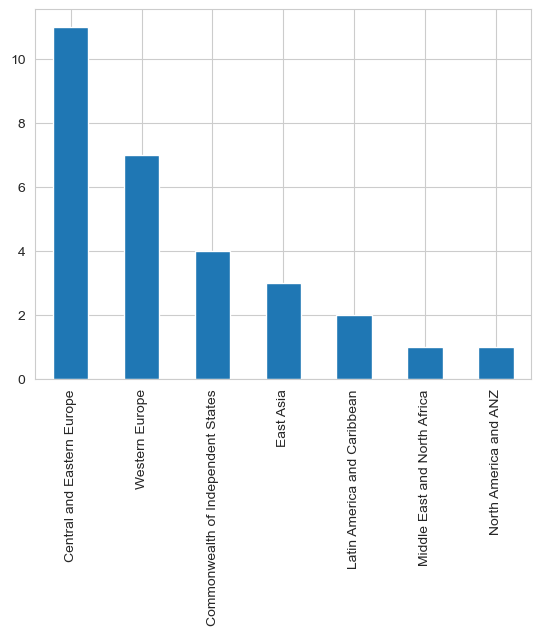

In [934]:
clusters.groupby('label').get_group(4)['Regional indicator'].value_counts().plot(kind = 'bar')

In [916]:
clusters.groupby('label').get_group(2).mean()

C:\Users\eilaf\anaconda3\envs\datakougi\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Ladder score                     4.299011
Logged GDP per capita            7.672311
Social support                   0.657648
Healthy life expectancy         55.182391
Freedom to make life choices     0.734377
Generosity                       0.072523
Perceptions of corruption        0.751111
ATMs per 100,000 2010_2020       7.206248
prices inflation % 2010_2020    33.651781
Gini index 2010_2020            43.438889
Employment ratio % 2010_2020    69.184945
Urban population % 2010_2020    36.083500
label                            2.000000
dtype: float64